# EDA - Synthetic Data

In [1]:
import numpy as np
import pandas as pd
import sweetviz as sv

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
case_info = './data/law_group_case_data_with_noise_and_outliers.xlsx'

df = pd.read_excel(case_info)

df

,case_type,case_status,marketing_source,injury_type,medical_expense_amount,potential_settlement_amount,attorney_name,injury_severity_score,client_age,client_gender,case_priority,insurance_claim_made,insured,next_action
0,Personal Injury,Open,TV,Soft Tissue Injury,23517,86381,Sarah K. Connor,1,26,Non-binary,Medium,True,0,Await Documents
1,Medical Malpractice,Open,Online,Laceration,25015,58349,William J. Thompson,4,21,Male,Low,True,1,Schedule Meeting
2,Personal Injury,In Progress,Radio,Soft Tissue Injury,104282,83816,Elizabeth M. Harris,2,87,Male,Medium,False,0,Await Documents
3,Medical Malpractice,Settled,Referral,Laceration,10403,99481,Jonathan P. Reed,9,45,Non-binary,High,True,0,Follow up
4,Personal Injury,Closed,Referral,Fracture,15198,85524,Elizabeth M. Harris,1,66,Non-binary,Medium,False,0,Schedule Meeting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Personal Injury,Closed,Online,Burn,11765,85042,William J. Thompson,4,58,Female,Medium,True,0,Await Documents
49996,Personal Injury,Open,Billboard,Soft Tissue Injury,7062,91998,Michael A. Stevens,3,76,Male,Low,True,0,Await Documents
49997,Medical Malpractice,Open,TV,Fracture,14490,71351,William J. Thompson,8,30,Non-binary,Low,True,0,Schedule Meeting
49998,Medical Malpractice,Settled,Billboard,Laceration,16181,71712,Michael A. Stevens,5,75,Male,Low,True,0,Follow up


                                             |          | [  0%]   00:00 -> (? left)


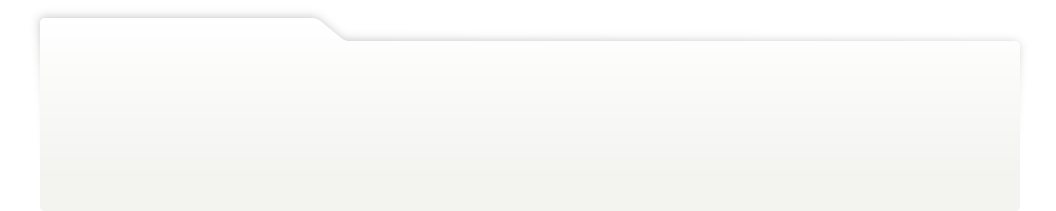
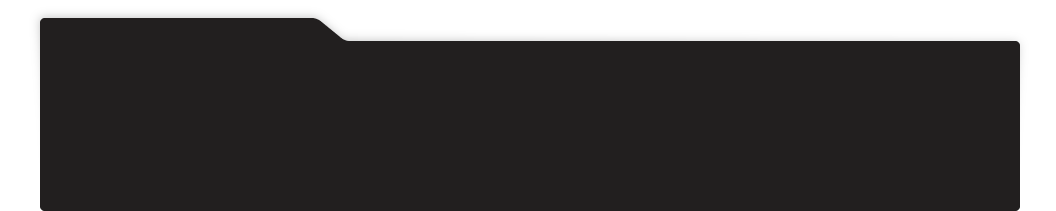
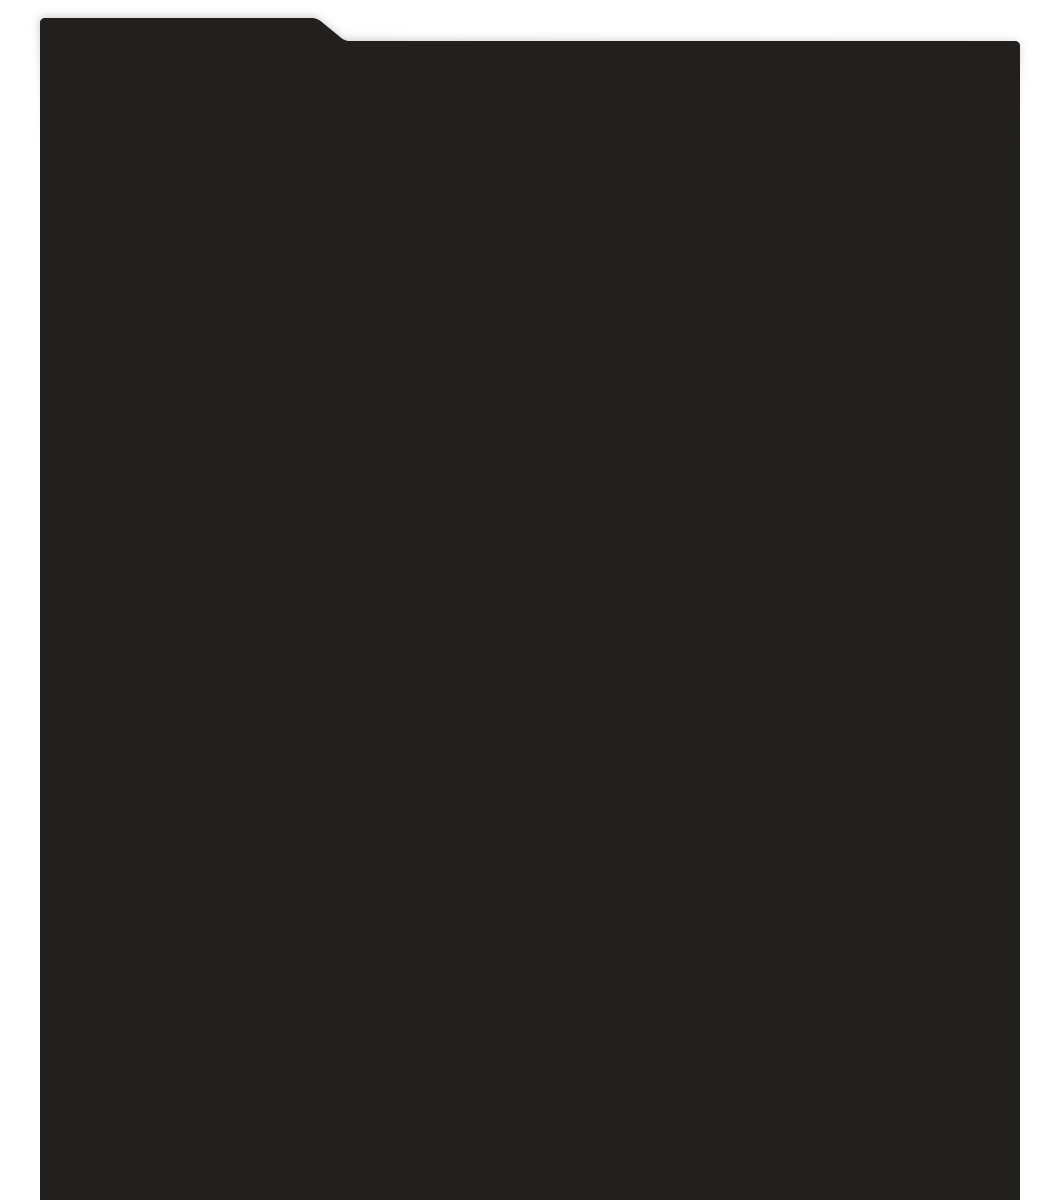
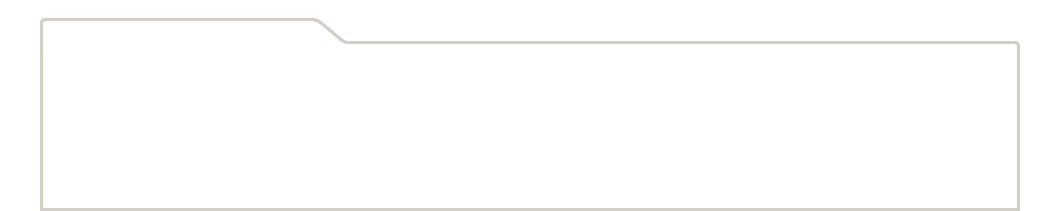
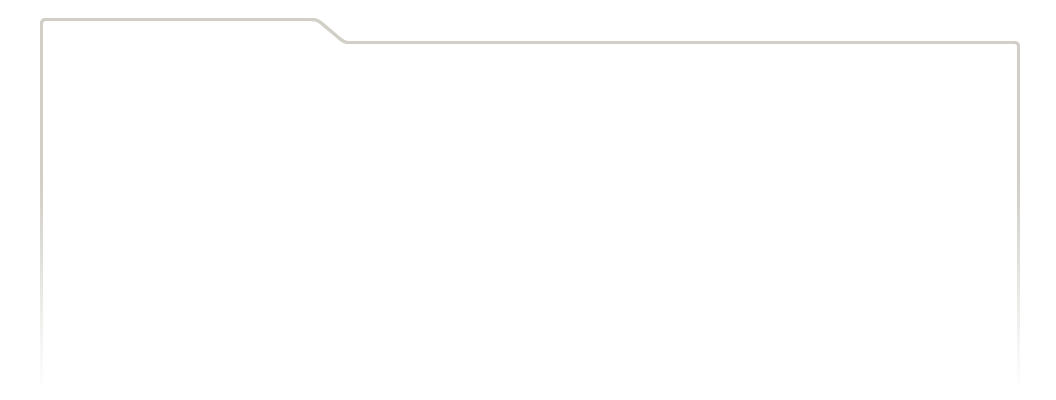
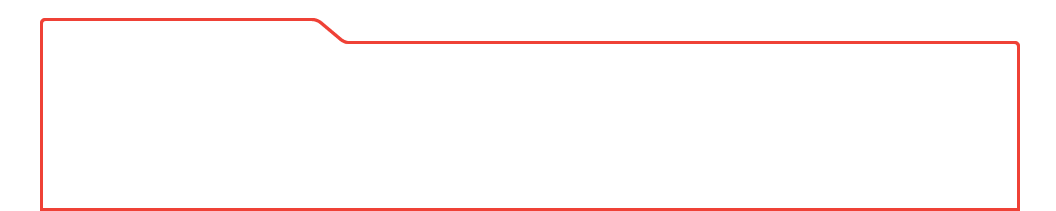
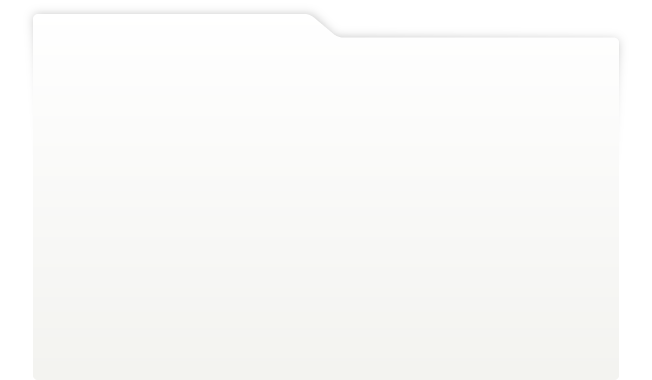
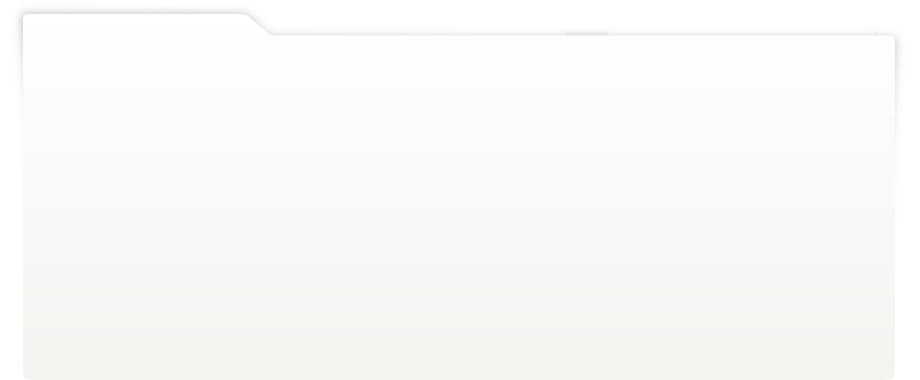
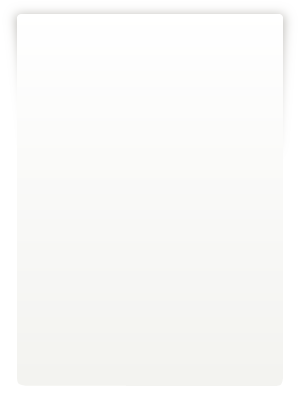
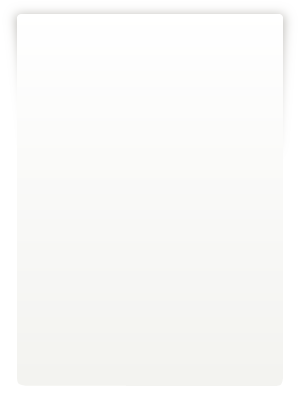
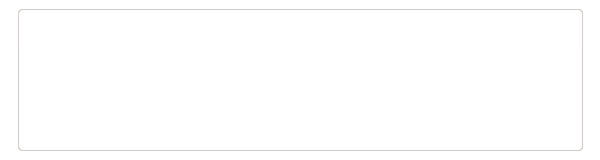
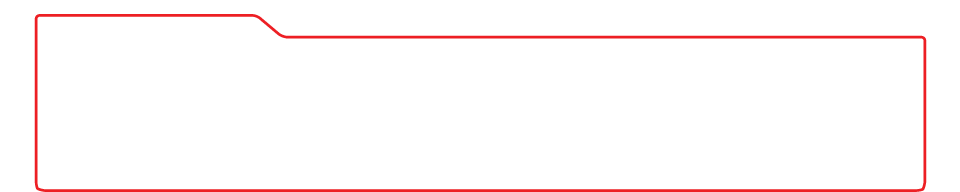
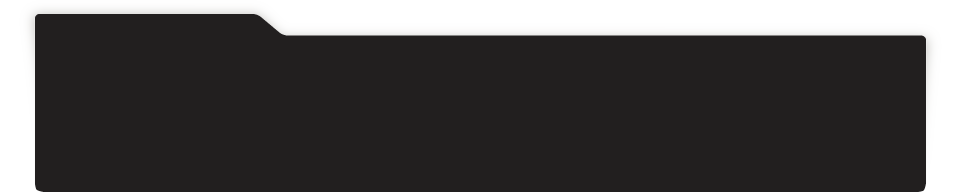
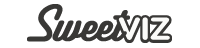
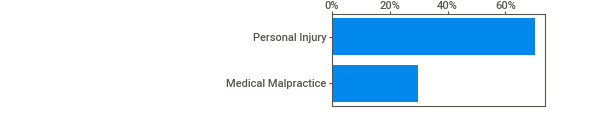
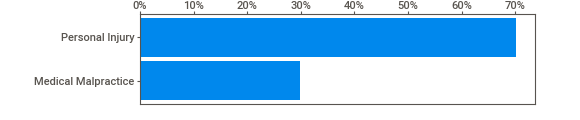
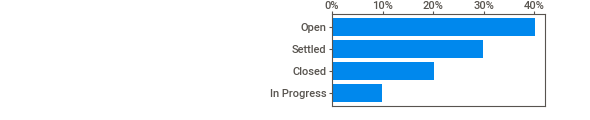
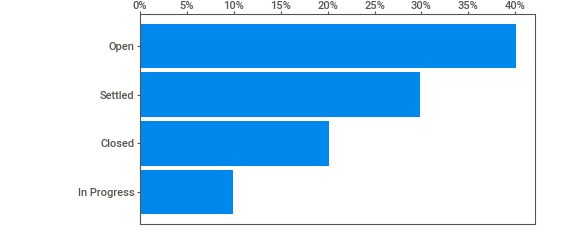
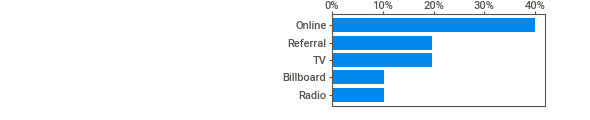
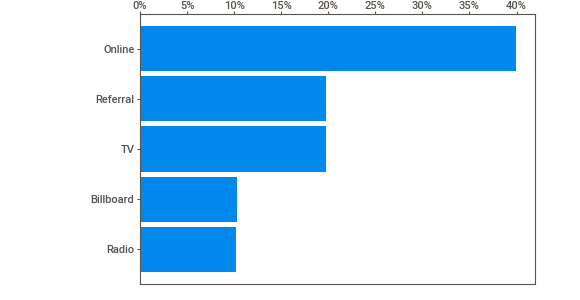
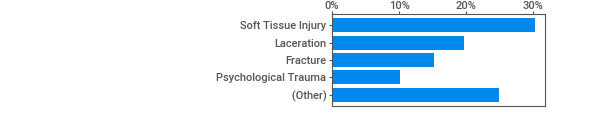
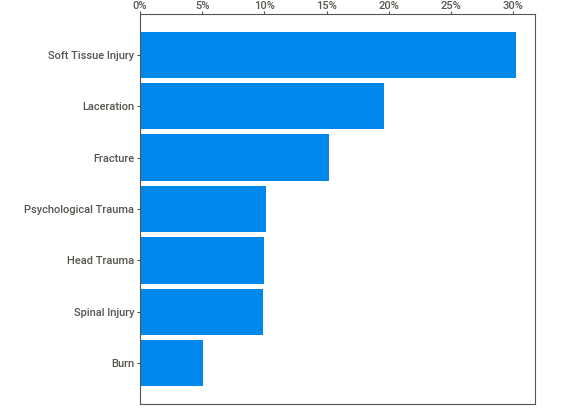
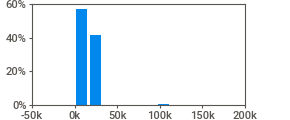
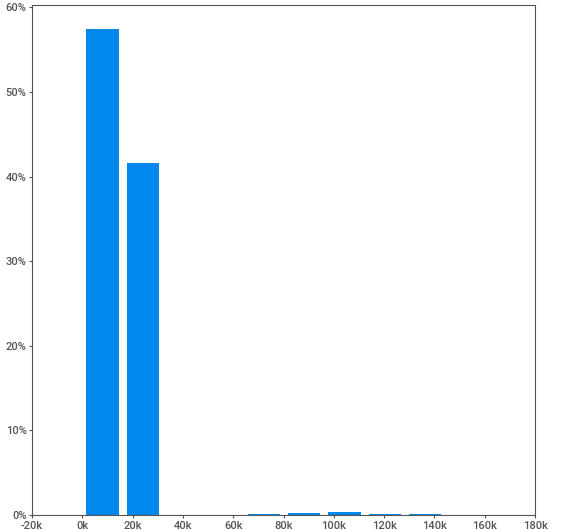
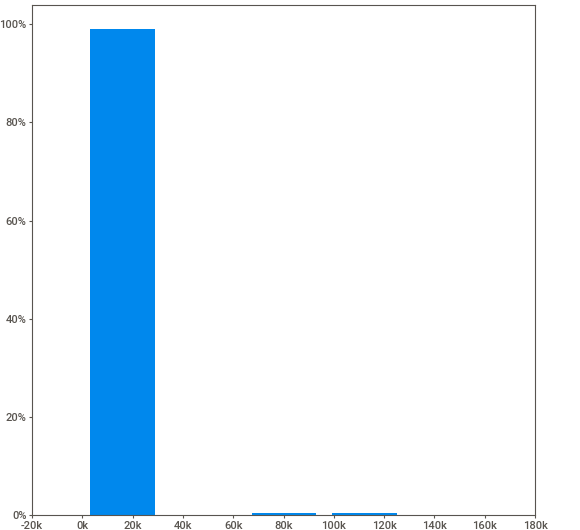
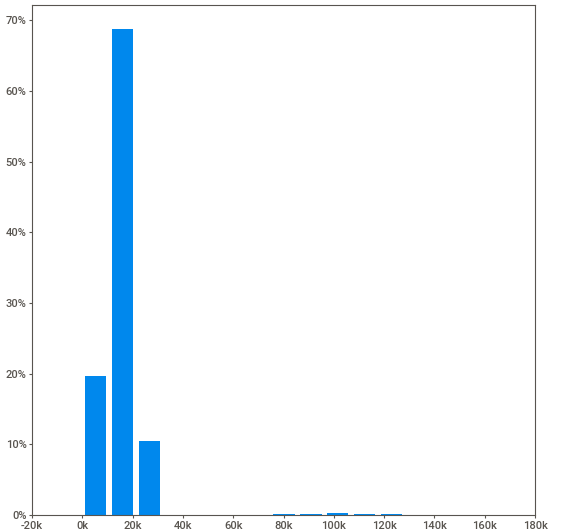
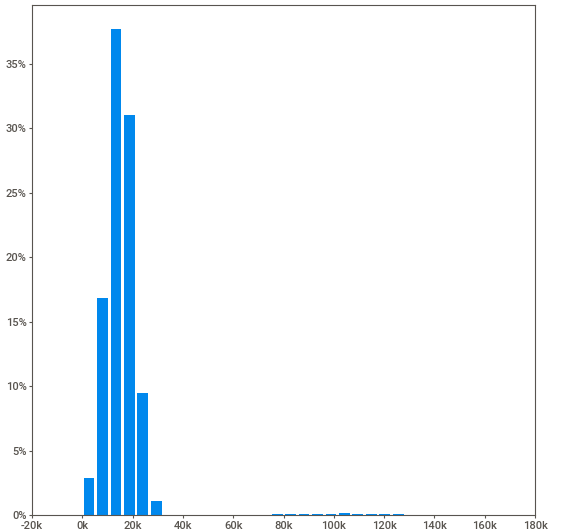
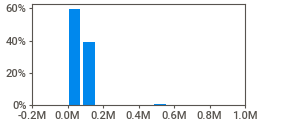
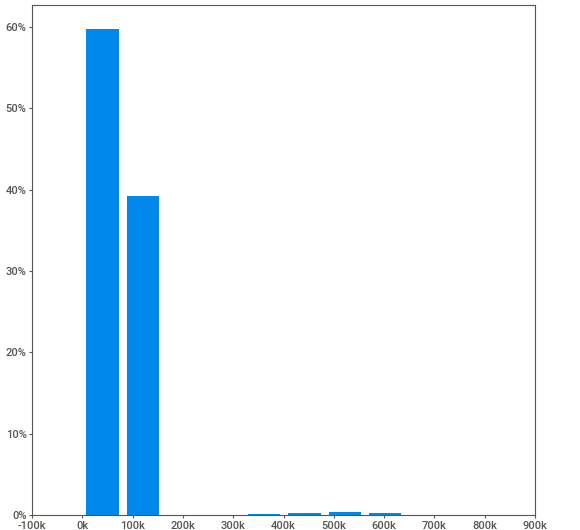
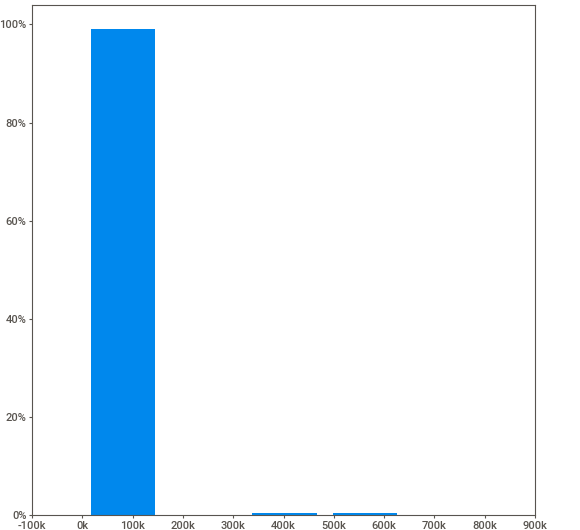
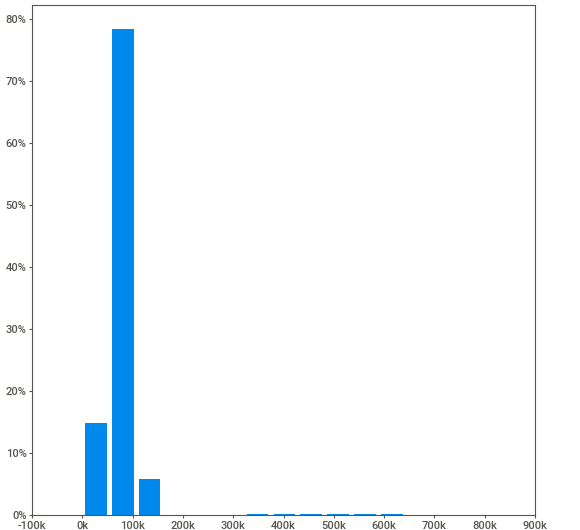
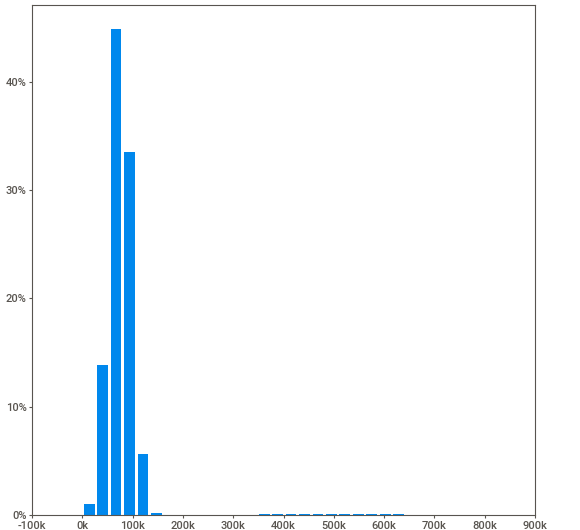
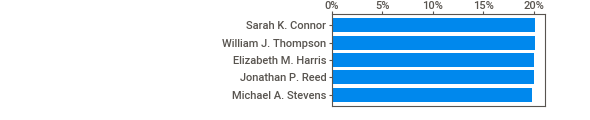
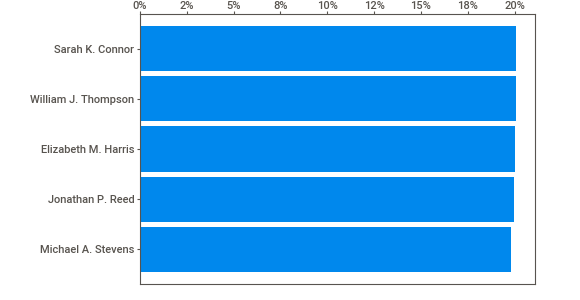
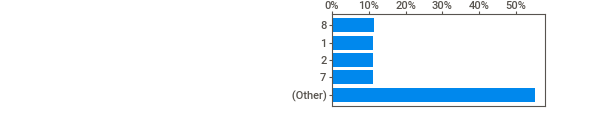
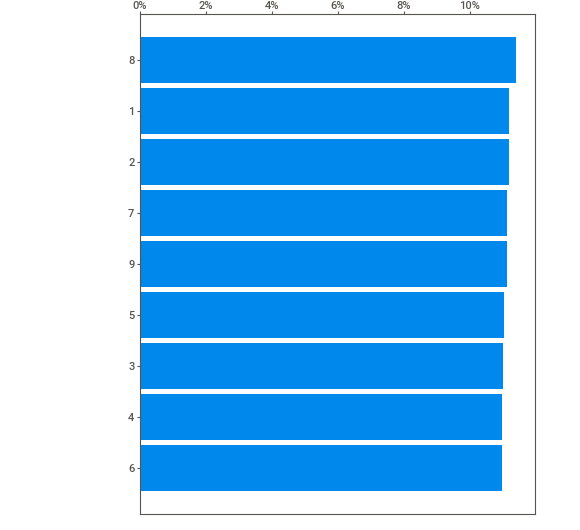
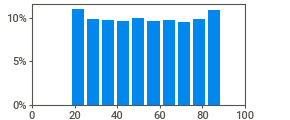
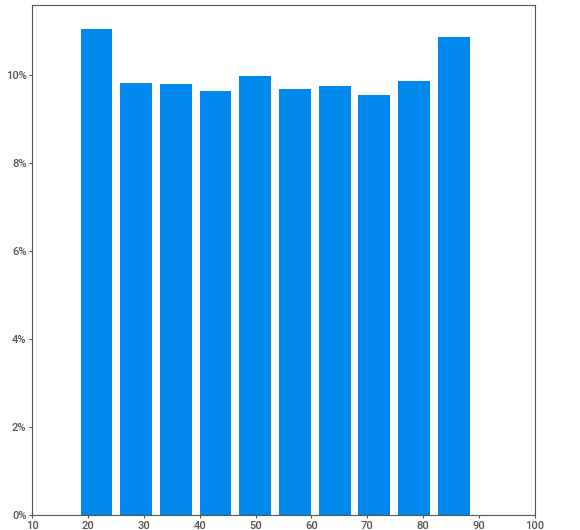
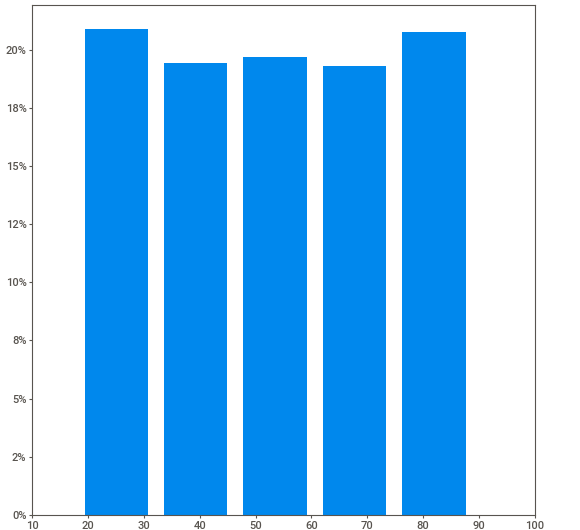
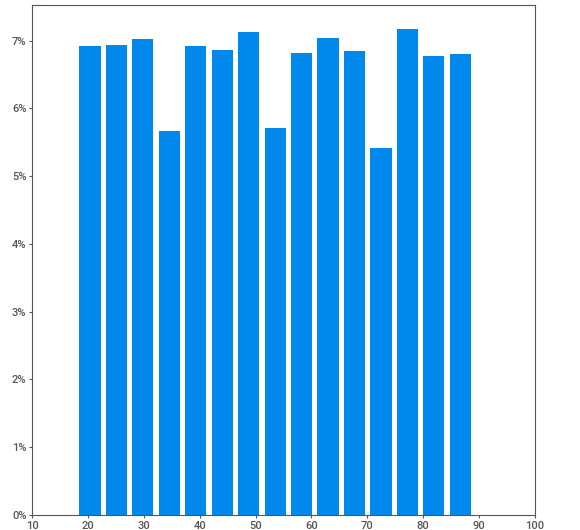
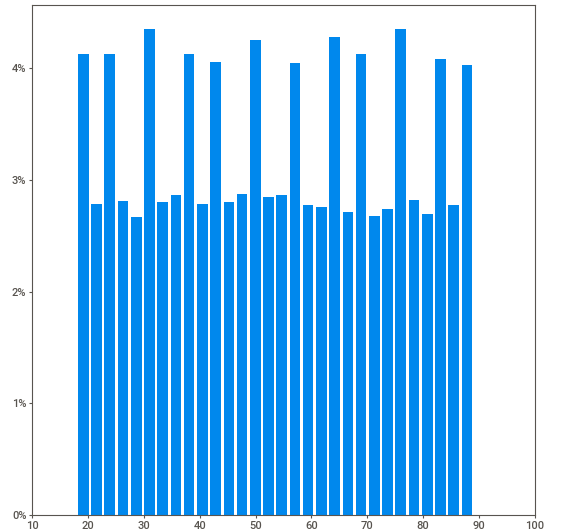
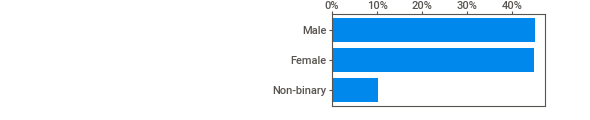
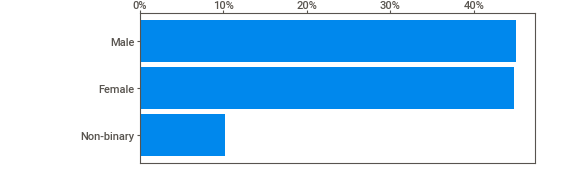
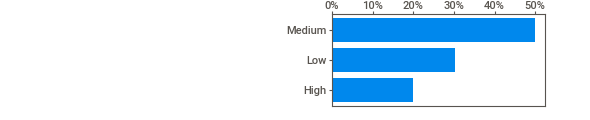
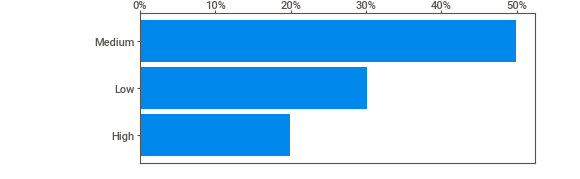
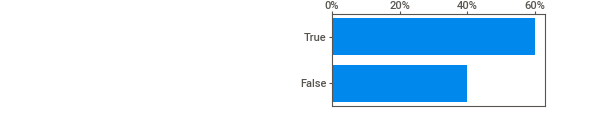
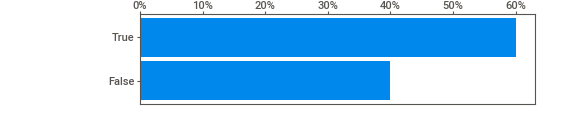
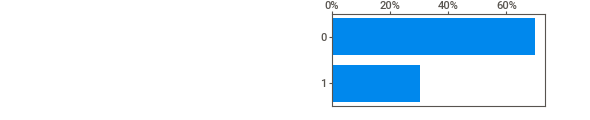
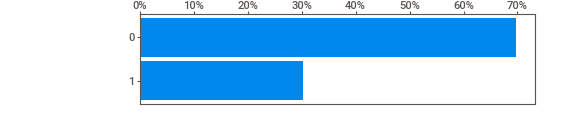
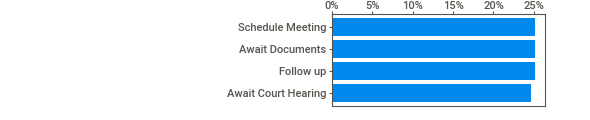
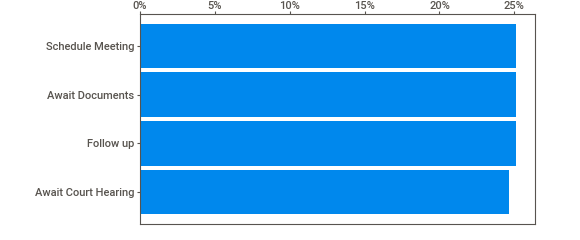

In [3]:
sv.analyze(df, pairwise_analysis='off').show_notebook()

# Data Review

---

As the data was artificially created for demonstration purposes, I know that there are a mix of balanced and imbalanced categorical features, as well as numeric features containing outliers.

For purposes of this EDA notebook, I will review each feature in the context of the target feature, `potential_settlement_amount`.

---

In [4]:
df.columns.to_list()

['case_type',
 'case_status',
 'marketing_source',
 'injury_type',
 'medical_expense_amount',
 'potential_settlement_amount',
 'attorney_name',
 'injury_severity_score',
 'client_age',
 'client_gender',
 'case_priority',
 'insurance_claim_made',
 'insured',
 'next_action']

# Feature: `case_type`

In [5]:
df['case_type'].describe()

count               50000
unique                  2
top       Personal Injury
freq                35098
Name: case_type, dtype: object

In [6]:
df['case_type'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

case_type
Personal Injury        0.702
Medical Malpractice    0.298
Name: proportion, dtype: float64

---

**Review:**

* Categorical feature
* Imbalanced classes - problematic for classification modeling if used.
* Higher number of personal injury cases raises questions
    * *Are there more leads for such cases?*
    * *Is the law firm positioned more strongly to handle personal injury cases?*
    * Deeper investigation required.

---

# Feature: `case_status`

In [14]:
df['case_status'].describe()

count     50000
unique        4
top        Open
freq      20048
Name: case_status, dtype: object

In [15]:
df['case_status'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

case_status
Open           0.401
Settled        0.299
Closed         0.201
In Progress    0.099
Name: proportion, dtype: float64

---

**Review:**

* Categorical feature
* Imbalanced classes - problematic for classification modeling if used.

* Large percentage of "Open" and "In Progress" cases
    * What are the bottlenecks preventing cases from progressing down the lifecycle?
    * How can technology help smooth out the intake and lead conversion processes?

---

# Feature: `marketing_source`

In [16]:
df['marketing_source'].describe()

count      50000
unique         5
top       Online
freq       19982
Name: marketing_source, dtype: object

In [17]:
df['marketing_source'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

marketing_source
Online       0.400
Referral     0.198
TV           0.198
Billboard    0.103
Radio        0.102
Name: proportion, dtype: float64

---

**Review:**

* Categorical feature
* Imbalanced classes - problematic for classification modeling if used.

* Online referrals are strongest, followed by referrals from previous cases and from TV.
    * Marketing should focus on implementing solutions targeted to these sources.
    * How could they improve the "referral" score? Better post-case followup?

---

# Feature: `injury_type`

In [11]:
df['injury_type'].describe()

count                  50000
unique                     7
top       Soft Tissue Injury
freq                   15119
Name: injury_type, dtype: object

In [12]:
df['injury_type'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

injury_type
Soft Tissue Injury      0.302
Laceration              0.196
Fracture                0.152
Psychological Trauma    0.101
Head Trauma             0.099
Spinal Injury           0.099
Burn                    0.050
Name: proportion, dtype: float64

# Feature: `medical_expense_amount`

In [13]:
df['medical_expense_amount'].describe().round(2)

count     50000.00
mean      15864.74
std       10132.40
min           1.00
25%       11625.75
50%       15082.00
75%       18573.00
max      160328.00
Name: medical_expense_amount, dtype: float64

In [ ]:
df['medical_expense_amount'].plot(kind='barh')

KeyboardInterrupt: 

<Axes: xlabel='medical_expense_amount', ylabel='potential_settlement_amount'>

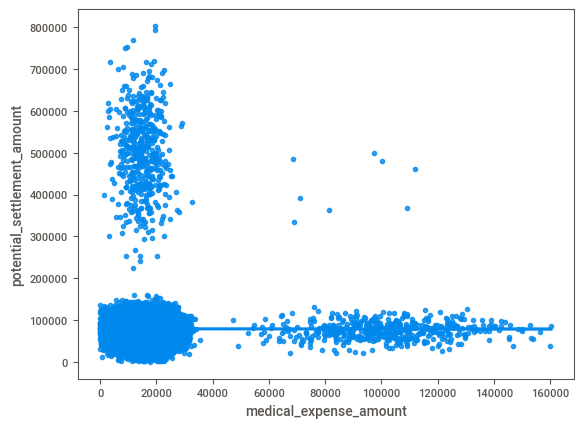

In [33]:
sns.regplot(data=df, x='medical_expense_amount', y = 'potential_settlement_amount')

---

*Review:*

* Outliers present in data negatively impact the performance of the linear regression plot


# Feature: `potential_settlement_amount`

In [ ]:
df['case_type'].describe()

count               50000
unique                  2
top       Personal Injury
freq                35098
Name: case_type, dtype: object

In [ ]:
df['case_type'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

case_type
Personal Injury        0.702
Medical Malpractice    0.298
Name: proportion, dtype: float64

# Feature: `attorney_name`

In [ ]:
df['case_type'].describe()

count               50000
unique                  2
top       Personal Injury
freq                35098
Name: case_type, dtype: object

In [ ]:
df['case_type'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

case_type
Personal Injury        0.702
Medical Malpractice    0.298
Name: proportion, dtype: float64

# Feature: `injury_severity_score`

In [ ]:
df['case_type'].describe()

count               50000
unique                  2
top       Personal Injury
freq                35098
Name: case_type, dtype: object

In [ ]:
df['case_type'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

case_type
Personal Injury        0.702
Medical Malpractice    0.298
Name: proportion, dtype: float64

# Feature: `client_age`

In [ ]:
df['case_type'].describe()

count               50000
unique                  2
top       Personal Injury
freq                35098
Name: case_type, dtype: object

In [ ]:
df['case_type'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

case_type
Personal Injury        0.702
Medical Malpractice    0.298
Name: proportion, dtype: float64

# Feature: `client_gender`

In [ ]:
df['case_type'].describe()

count               50000
unique                  2
top       Personal Injury
freq                35098
Name: case_type, dtype: object

In [ ]:
df['case_type'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

case_type
Personal Injury        0.702
Medical Malpractice    0.298
Name: proportion, dtype: float64

# Feature: `case_priority`

In [ ]:
df['case_type'].describe()

count               50000
unique                  2
top       Personal Injury
freq                35098
Name: case_type, dtype: object

In [ ]:
df['case_type'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

case_type
Personal Injury        0.702
Medical Malpractice    0.298
Name: proportion, dtype: float64

# Feature: `insurance_claim_made`

In [ ]:
df['case_type'].describe()

count               50000
unique                  2
top       Personal Injury
freq                35098
Name: case_type, dtype: object

In [ ]:
df['case_type'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

case_type
Personal Injury        0.702
Medical Malpractice    0.298
Name: proportion, dtype: float64

# Feature: `insured`

In [ ]:
df['case_type'].describe()

count               50000
unique                  2
top       Personal Injury
freq                35098
Name: case_type, dtype: object

In [ ]:
df['case_type'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

case_type
Personal Injury        0.702
Medical Malpractice    0.298
Name: proportion, dtype: float64

# Feature: `next_action`

In [ ]:
df['case_type'].describe()

count               50000
unique                  2
top       Personal Injury
freq                35098
Name: case_type, dtype: object

In [ ]:
df['case_type'].value_counts(normalize=True, ascending=False, dropna=False).round(3)

case_type
Personal Injury        0.702
Medical Malpractice    0.298
Name: proportion, dtype: float64